# Jupyter Notebook Supplement for Lab 04 - Brandon Klein

This Jupyter Notebook is to be completed as part of your report for Lab 04. Use text cells to answer questions and code sections to input, fit, and plot data.

In [40]:
# Load the standard set of libraries for basic numerical computing.
import numpy as np
%matplotlib notebook  
import matplotlib
import matplotlib.pyplot as plt  

# Module 25C

1) Input your position, potential difference, and spacing data for Module 25C here.

In [41]:
spacing=0.5   #INPUT Probe spacing in cm.
#The next two lines are two options for INPUT-ing position data. Choose one by removing the #.
# position= numpy.arange(0,30,1)  #arange(x,y,d) gives us an array from x to y in increments of d
position=np.arange(0,28,1)
#nter your voltage data below as [dV1, dV2, dV3,...dV30]  Note that the length of the voltage array must be the same as the position array. 
voltage=np.array([.002,.008,.01,.02,.026,.037,.057,.062,.069,.069,.088,.030,.085,.105,.075,.056,.049,.022,.016,.027,.018,.01,.008,.005,.004,.003,.002,.001])
field=voltage/spacing
width=np.array([21,19,15.5,13.3,10.6,9.1,7.2,6.2,5.6,4.2,2.8,3.3,2.9,2.7,2.7,2.7,2.9,3.1,3.6,4.3,5.1,6.1,7.7,9.1,10.6,12.7,15.2,17])


The cell below shows the syntax for polyfit, which returns an array with the least squares fit coefficients, starting with the coefficient for the highest order. For example polyfit(x,y,2) might return an array [0.01,2.07,6] which means the best fit is: $y(x)=0.01*x^2+2.07*x+6$.

In [42]:
fit1=np.polyfit(position,field,1)    # Do a polynomial least squares fit to the data pairs position and field. 
# The third parameter in the () is the order of the fit.Here is an example of a fit to a first order polynomial.
print (fit1)
fitcalc1=fit1[0]*position+fit1[1]

[-0.00233498  0.10037931]


2) Edit the cell below to find the best fit to your data for a polynomial of order 0.

In [43]:
fit0=np.polyfit(position,field,0)    
print (fit0)
#needed to convert to array type, though mathematically trivial.
fitcalc0=0*position+fit0[0]

[0.06885714]


3) Edit the cell below to find the best fit to your data for a polynomial of order 2.

In [44]:
fit2=np.polyfit(position,field,2)    # Do a polynomial least squares fit to the data pairs position and voltage. The third parameter in the () is the order of the fit.
print (fit2)
fitcalc2=fit2[0]*position**2+fit2[1]*position+fit2[2]

[-0.00076628  0.01835468  0.01072414]


4) The code below plots your field data and the two fits as a function of position. Edit the axis labels.

<IPython.core.display.Javascript object>


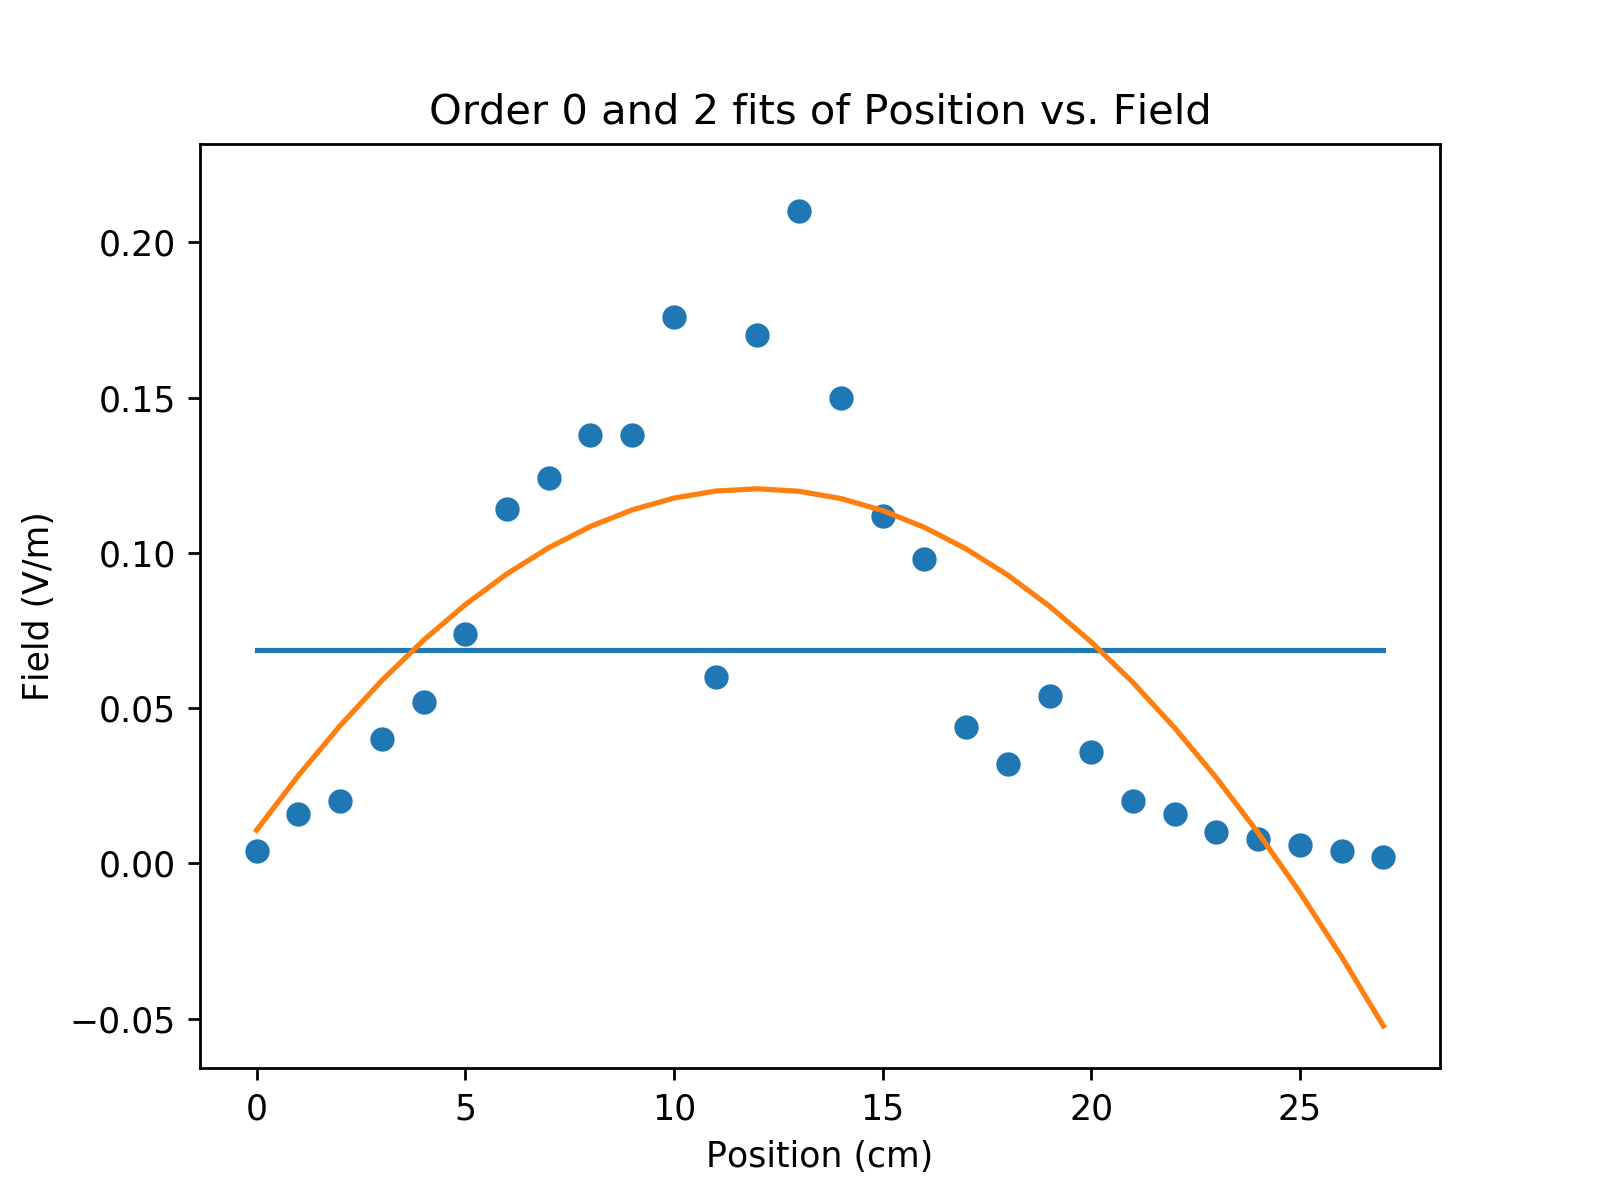

In [45]:
plt.figure()
plt.scatter(position,field)
plt.plot(position, fitcalc0)
plt.plot(position, fitcalc2)
plt.title("Order 0 and 2 fits of Position vs. Field")
plt.xlabel("Position (cm)")
plt.ylabel("Field (V/m)")
plt.show()

5) Describe in the text box below which of the two fits looks better to your eye and whether you think you might get a better fit with a higher order polynomial.

The quadratic regression provided a much more realistic and suiting fit for the data than the constant (0 order) regression, by increasing the data to degree $n$, we could improve the least square regression, getting a better fit for polynomials under a leading order of $x^4$, as after this point, any even power of $x$, (needed to maintain end behavior) would be needsesly specific in accounting for outliers.

6) Edit the code below to plot the field against the inverse of the width and fit field as a function of 1/width to a straight line.. 

<IPython.core.display.Javascript object>


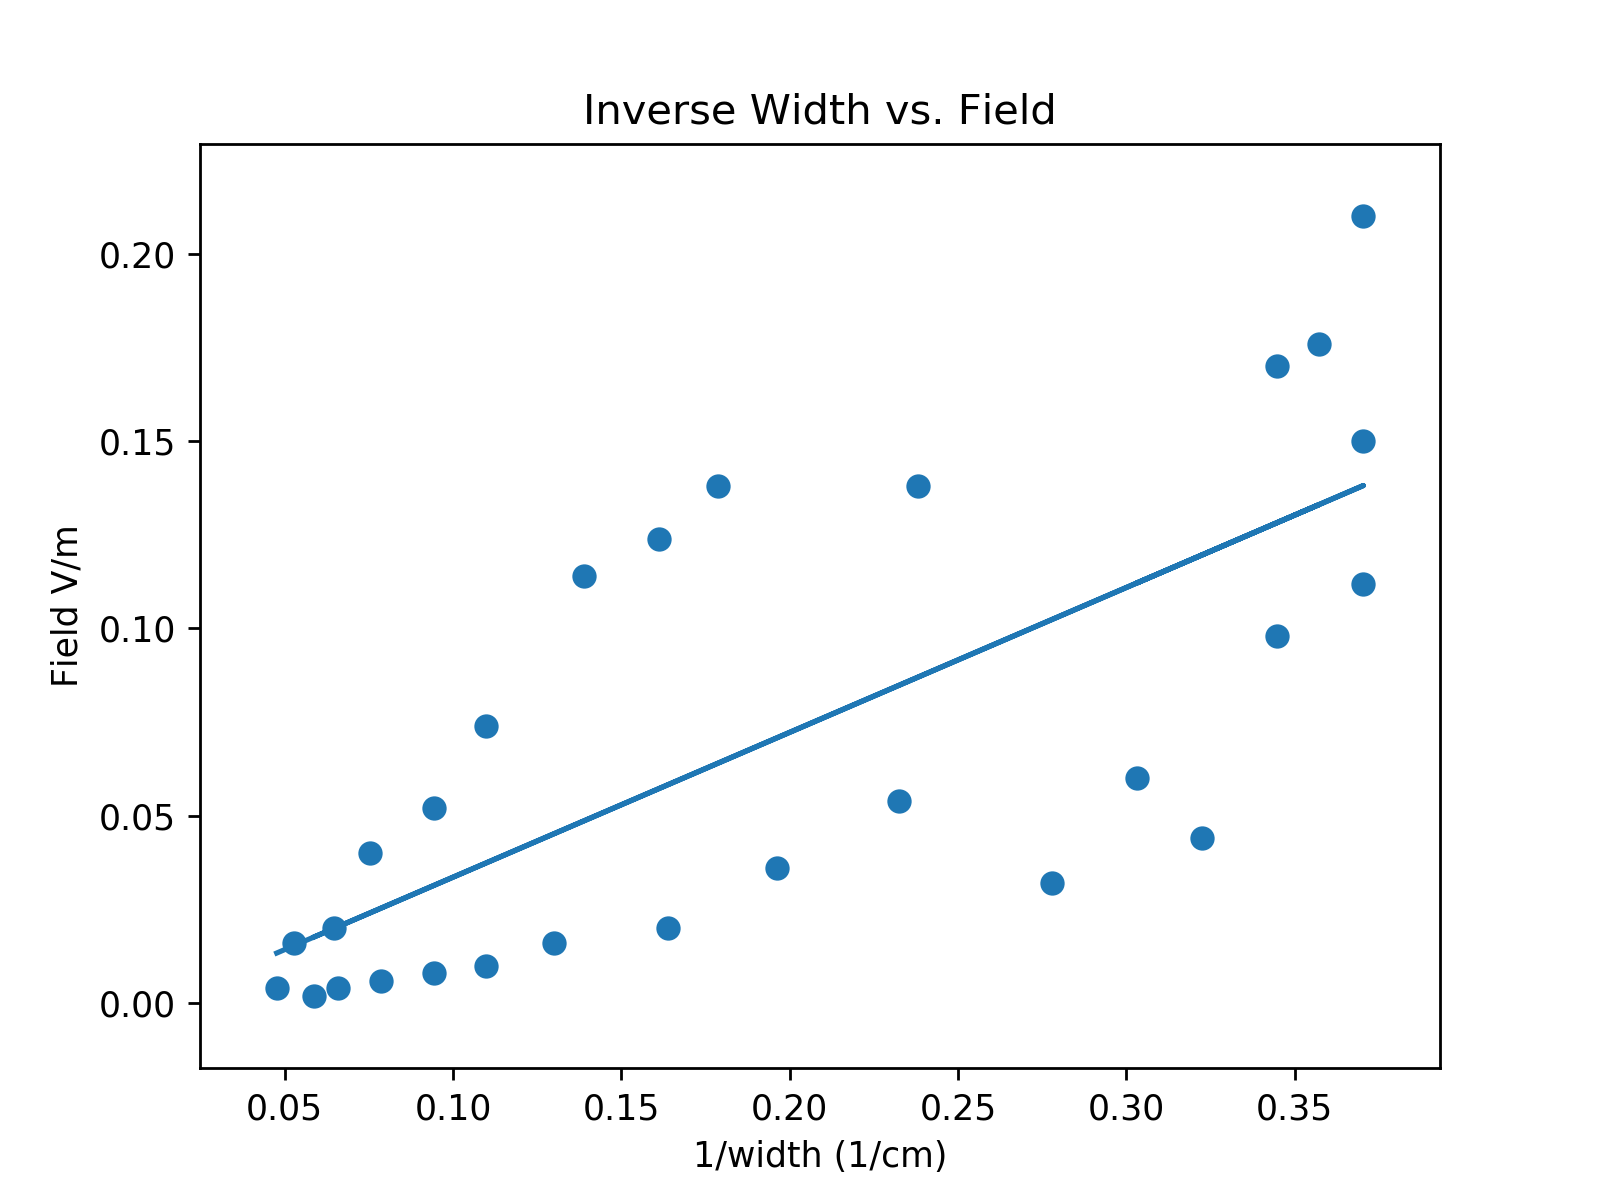

In [46]:
InverseWidth=1/width     # INPUT correct functional command to calculate inverse width at each data measurement position.
fitEvsInvWidth=np.polyfit(InverseWidth,field,1)             # INPUT the fitting command to fit Field to InverseWidth
FitE=fitEvsInvWidth[0]*InverseWidth+fitEvsInvWidth[1]
plt.figure()
plt.scatter(InverseWidth,field)
plt.plot(InverseWidth,FitE)
plt.title("Inverse Width vs. Field")
plt.xlabel("1/width (1/cm)")
plt.ylabel("Field V/m")
plt.show()

7) Discuss in the text box below whether there is a reasonable linear reationship between field and Inverse Width. If there is not, then what factors might influence the field?

There appears to be a mildy weak correlation between field and inverse width. Though, the largest factor affecting this is distance to the charge sources. creating the dichotomous split seen in the graph.

# Module 25F

8) Edit the cell below to input, fit, and plot resistor data.

<IPython.core.display.Javascript object>


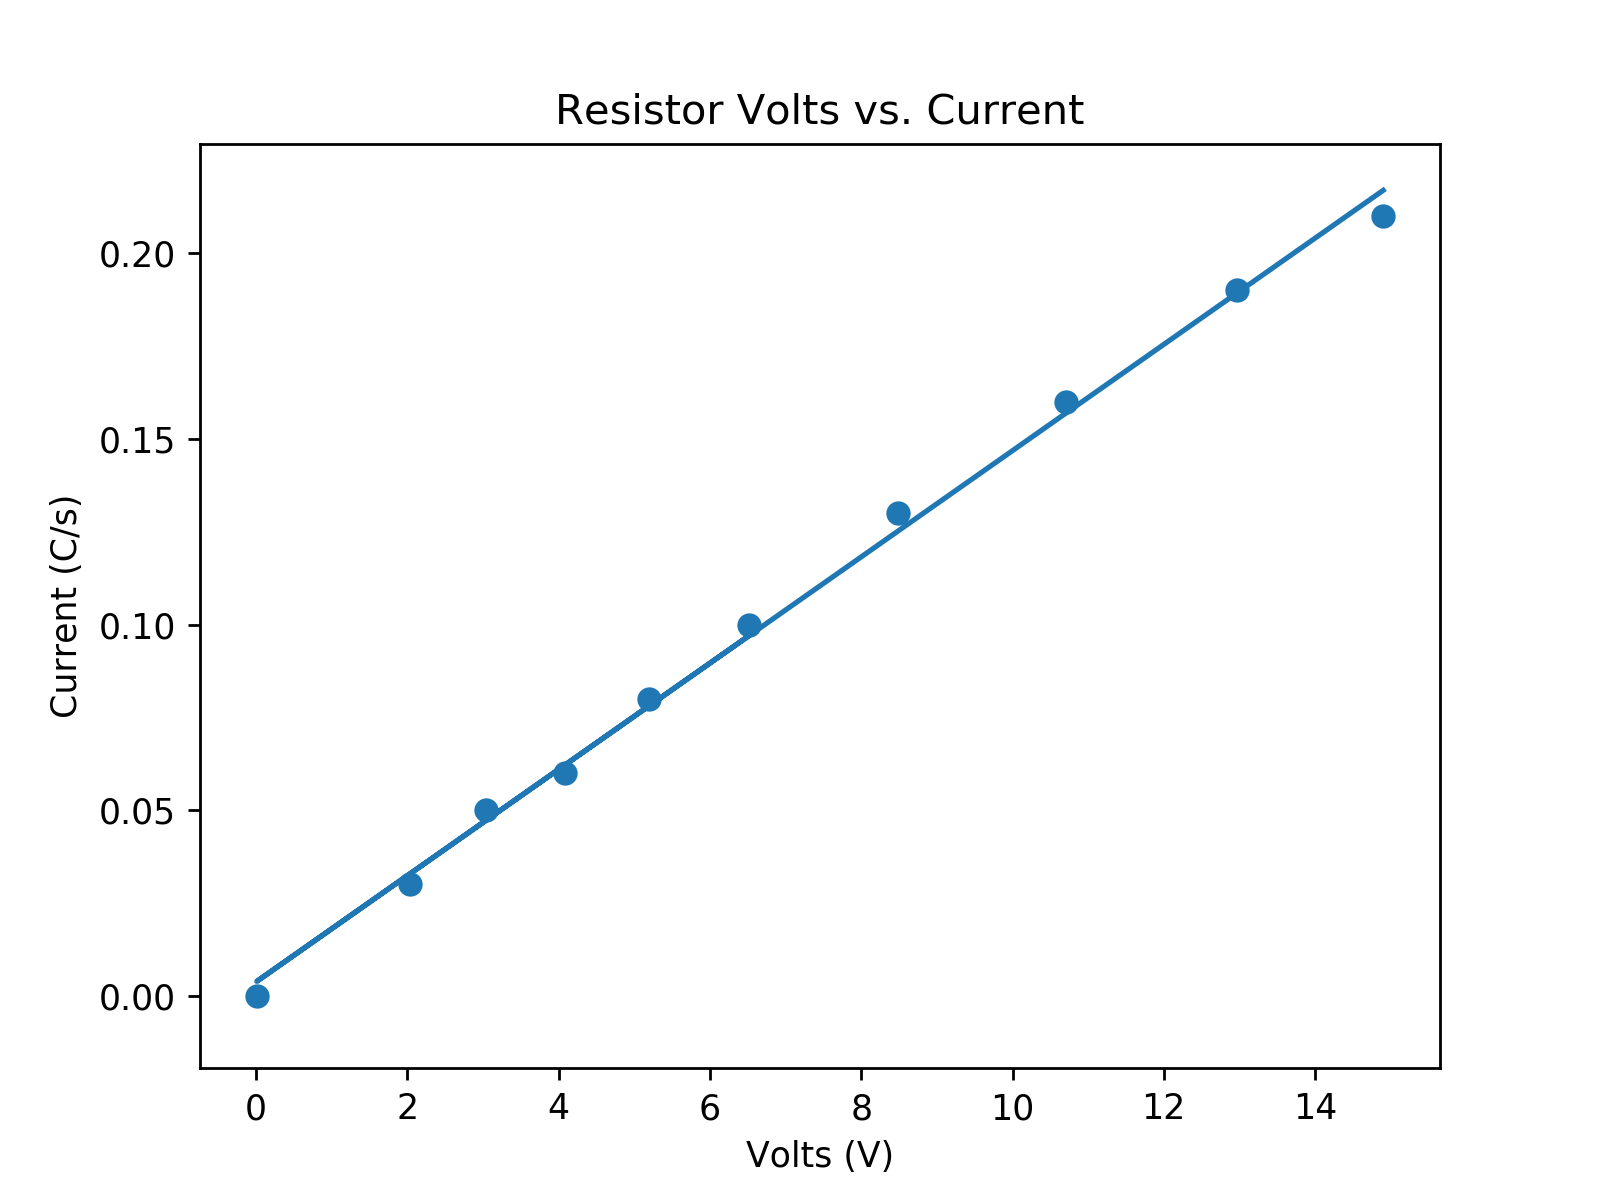

In [47]:
ResistorVolts=np.array([6.52, 5.2, 4.08, 3.04, 2.04, .01, 8.49, 10.71, 12.97, 14.9])    #INPUT voltage data for resistor current vs voltage.
ResistorCurrent=np.array([.1, .08, .06, .05, .03, 0, .13, .16, .19, .21])  #INPUT voltage data for resistor current vs voltage.
# Do a least squares first order (linear) fit to the data.
ResistorFit=np.polyfit(ResistorVolts,ResistorCurrent,1)
ResistorFitCalc=ResistorFit[0]*ResistorVolts+ResistorFit[1]
plt.figure()
plt.scatter(ResistorVolts,ResistorCurrent)
plt.plot(ResistorVolts,ResistorFitCalc)    #Edit to plot the fit.
plt.title("Resistor Volts vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (C/s)")
plt.show()

9) Edit the cell below to input, plot,andfit light bulb data.

<IPython.core.display.Javascript object>


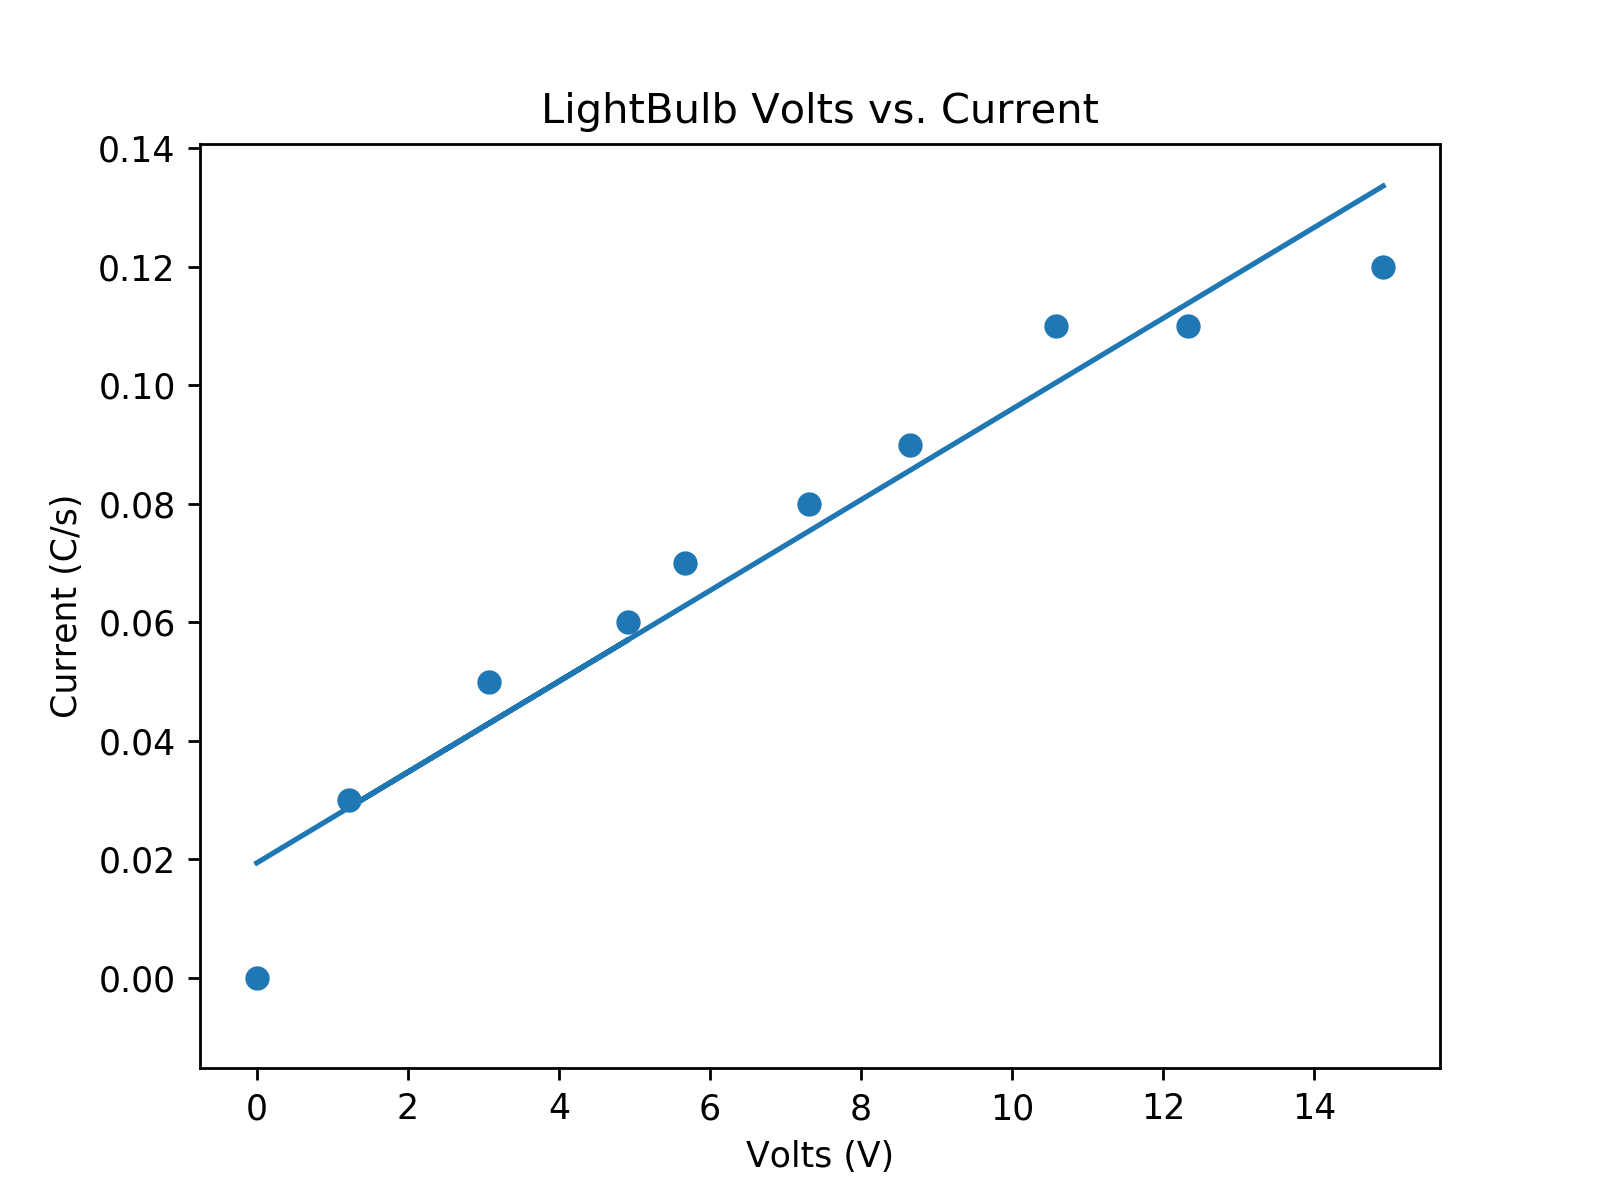

In [48]:
LBVolts=np.array([0, 4.92, 1.22, 3.07, 5.67, 7.31, 8.65, 10.58, 12.32, 14.91])
LBCurrent=([0, .06, .03, .05, .07, .08, .09, .11, .11, .12])
LBFit=np.polyfit(LBVolts, LBCurrent,1)
DiodeFitCalc=LBFit[0]*LBVolts+LBFit[1]
plt.figure()
plt.scatter(LBVolts,LBCurrent)
plt.plot(LBVolts,DiodeFitCalc)    #Edit to plot the fit.
plt.title("LightBulb Volts vs. Current")
plt.xlabel("Volts (V)")
plt.ylabel("Current (C/s)")
plt.show()
# Enter the plotting code here to plot Light Bulb Current as a function of Light Bulb Voltage.

10) In the box below discuss whether either the resistor or the light bulb could be considered to be ohmic. How did you make this decision?

The lightbuld can be considered ohmic, though it is not a perfect regression of the provided data, higher order, or logarithmic functions could better approximate the function as the effective resistence changes with current to to temperature effects on the filiment. 